# VAE Inference

In this tutorial, we will explore how to use an already trained VAE to do inference on new data. Once a neural network is trained, we often want to freeze the weights and use it to predict on new unseen data. This concept can be related to the Variational Autoencoder where one may have already trained a model and now wants to take a new dataset and transform it into the learned feature space of the VAE.

## Train VAE

First, we will train the VAE on the Murine Antigen dataset.

In [1]:
%%capture
import sys
sys.path.append('../../')
from DeepTCR.DeepTCR import DeepTCR_U

# Instantiate training object
DTCRU = DeepTCR_U('murine_antigens')

#Load Data from directories
DTCRU.Get_Data(directory='../../Data/Murine_Antigens',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=0,count_column=1,v_beta_column=2,j_beta_column=3)

#Train VAE
DTCRU.Train_VAE(Load_Prev_Data=False)

## Inference with VAE

Now, we will take the data from the Rudqvist murine dataset and run it through the VAE just trained on murine antigens. We will use the Get_Data method to parse the sequence data and feed it into the already trained VAE above.

In [2]:
%%capture
from DeepTCR.DeepTCR import DeepTCR_U

# Instantiate training object
DTCRU_rudq = DeepTCR_U('rudqvist')

#Load Data from directories
DTCRU_rudq.Get_Data(directory='../../Data/Rudqvist',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=1,count_column=2,v_beta_column=7,d_beta_column=14,j_beta_column=21)

In [3]:
beta_sequences = DTCRU_rudq.beta_sequences
v_beta = DTCRU_rudq.v_beta
j_beta = DTCRU_rudq.j_beta


Since the original VAE was trained to featurize a TCR from the beta sequence, v_beta, and j_beta, these are what we will use to put transform the Rudqvist data into this new feature space.This method outputs two results. The first is the features of the input data for inference and the second is an output used when this method is called for multi-model inference (it can be ignored for the purpose of doing inference with the VAE, is relevance is for when doing inference for the supervised TCR sequence model).

In [5]:
features = DTCRU.Sequence_Inference(beta_sequences=beta_sequences,v_beta=v_beta,j_beta=j_beta)

features now is a matrix of [N,num_features]. This represents the Rudqvist data being transformed into the feature space learned by the Murine antigens. This now allows us to compare these data in the same latent space.

## Comparing Datsets

Now that we have both datasets in the same features space, we can compare them with conventional UMAPs.

First, we can train a UMAP model on the original murine antigen dataset to reduce the dimensionality from 256 to 2 as follows.

In [6]:
import umap
umap_obj = umap.UMAP()
features_orig = umap_obj.fit_transform(DTCRU.features)

Now we can visualize the murine antigen-specific TCRs.

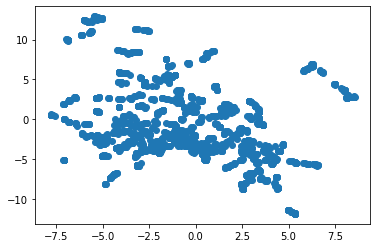

In [7]:
import matplotlib.pyplot as plt
plt.scatter(features_orig[:,0],features_orig[:,1])

We can transform now the Rudqvist dataset into the same UMAP space.

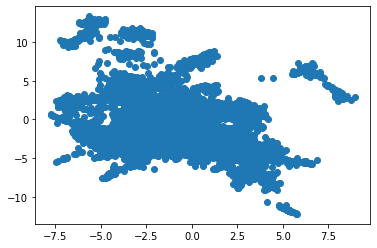

In [8]:
features_new = umap_obj.transform(features)
plt.scatter(features_new[:,0],features_new[:,1])

From this visualization, we can see that the antigen-specific pockets in the murine dataset also exist within the Rudqvist dataset suggesting these TCR's in the Ruqdvist dataset may be recognizing epitoes in the murine antigen dataset.